In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
from vae_interp.dataset import NpyDataset
from vae_interp.vae import VAE
import matplotlib.pyplot as plt
import torch
from vae_interp.sae import SAE

In [3]:
npy_path = "./vae_embeddings.npy"
dataset = NpyDataset(npy_path)

len(dataset)

49859

In [7]:
vae_checkpoint = "./checkpoints/vae"

vae = VAE.load_from_dir(vae_checkpoint)
vae.to("cuda")

VAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (2): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (3): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (mu_logvar): Conv2d(256, 8, kernel_siz

In [8]:
dataset[0]

tensor([ 0.3580, -0.7584, -0.7236,  0.2047,  0.4342, -1.0282, -0.5373, -0.3994,
         0.3159,  0.2271,  3.2967, -0.1082,  0.4442, -1.3350,  0.1087, -0.0599,
        -0.1499, -1.4915, -1.1173, -1.1423, -0.7139,  0.3007,  1.9337, -0.5247,
        -0.9506,  1.5348,  1.3062, -0.1191, -0.6700, -0.8807,  0.7381, -0.3178,
        -0.7549,  0.8090, -1.6190, -0.4869, -0.8433, -0.1409,  0.1760, -0.8304,
        -0.9876,  1.4467,  0.5713, -0.5600, -1.0598,  1.9426, -0.2219, -0.9749,
         0.4190,  0.1557, -1.1312,  0.3236,  0.4938, -1.1100, -0.1721,  1.0031,
         0.2506,  0.7770, -1.8356,  0.3198,  0.2038, -0.9374, -1.2771,  0.7020])

In [20]:
# sanity check to make sure it decodes to the right image with VAE
embedding = dataset[1].view(4, 4, 4).unsqueeze(0).to("cuda")
embedding.shape

torch.Size([1, 4, 4, 4])

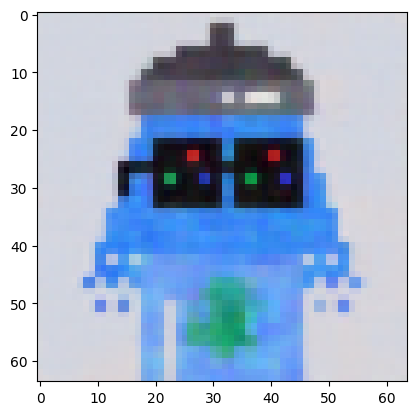

In [21]:
vae.eval()
with torch.no_grad():
    recon = vae.decode(embedding)
    recon = recon.cpu().squeeze(0).permute(1, 2, 0)
    recon = img = (recon - recon.min()) / (recon.max() - recon.min())

plt.imshow(recon)

In [44]:
sae = SAE(
    in_features=4**3,
    expansion_factor=2
)

sae.to("cuda")

SAE()

In [45]:
batch = dataset[0].unsqueeze(0).to("cuda")

In [46]:
sae(batch)

(tensor([[ 0.2142, -0.7290,  1.3897,  1.9620, -1.1710,  1.3429,  0.5422, -1.3332,
          -0.8552,  0.3097, -0.3327, -0.4850, -0.4942,  0.4773,  0.5729, -0.1551,
          -0.1799,  1.2658, -0.3589,  2.0375, -0.6175, -0.1345,  0.7455, -1.0171,
           3.3428,  1.0384,  2.6237,  1.4940, -0.6343, -0.0604,  0.1838,  0.9250,
           0.0374,  0.5488,  0.7227, -1.8729, -1.3304, -0.3043,  0.4842,  1.6577,
           0.5636,  0.3128, -2.5418,  0.5245,  0.4679, -1.1719,  0.2284,  1.0761,
          -0.1435,  1.0712,  0.5981, -0.4468,  0.2415, -0.6850,  1.6466, -0.0634,
           1.0396,  0.9254, -0.0354, -0.9078, -0.1945, -0.0796, -1.0963, -0.2064]],
        device='cuda:0', grad_fn=<AddBackward0>),
 tensor([[1.0835, 0.0000, 0.0000, 0.1215, 0.0000, 0.0000, 0.0000, 0.1272, 0.0000,
          0.6605, 0.0000, 0.1747, 0.0000, 0.0000, 1.8156, 0.0825, 0.0000, 0.2243,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.7182, 0.7113, 0.3026, 0.00

In [51]:
sae.features

tensor([[-0.0607,  0.0086, -0.0434,  ..., -0.1866, -0.1915, -0.0006],
        [ 0.1584, -0.0179, -0.1120,  ...,  0.0129, -0.0384, -0.1194],
        [ 0.1100, -0.1904,  0.0127,  ..., -0.2100,  0.1267,  0.1501],
        ...,
        [ 0.0245,  0.1871, -0.1977,  ..., -0.2035, -0.0472, -0.1778],
        [-0.0299,  0.1867, -0.1543,  ..., -0.1497, -0.0989, -0.0475],
        [-0.0751,  0.1502, -0.1025,  ...,  0.0240,  0.1962, -0.0147]],
       device='cuda:0', grad_fn=<DivBackward0>)